In [2]:
import pandas as pd


In [3]:
data = pd.read_csv("Salary_Data.csv")

In [4]:
df = data.copy()
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [49]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]
# x
y

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


Understanding the data

In [18]:
df.shape


(30, 2)

In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [20]:
df.isna().sum()


YearsExperience    0
Salary             0
dtype: int64

In [21]:
df.describe()


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


Plotting the data to check for outliers

In [23]:
import matplotlib.pyplot as plt

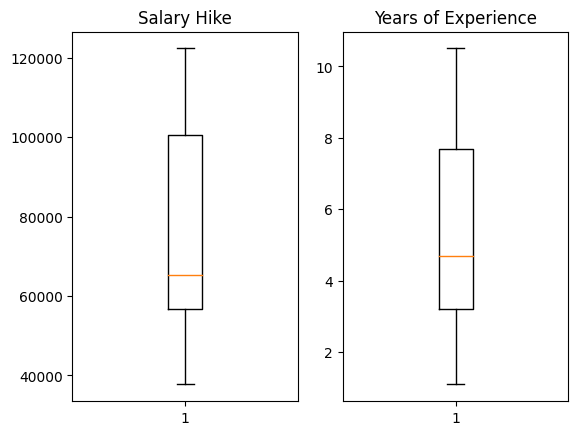

In [25]:
plt.subplot(121)
plt.boxplot(df['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(df['YearsExperience'])
plt.title('Years of Experience')
plt.show()

we can see there are no Outliers in the data

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

Checking the Correlation between variables

In [27]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [28]:
import seaborn as sns

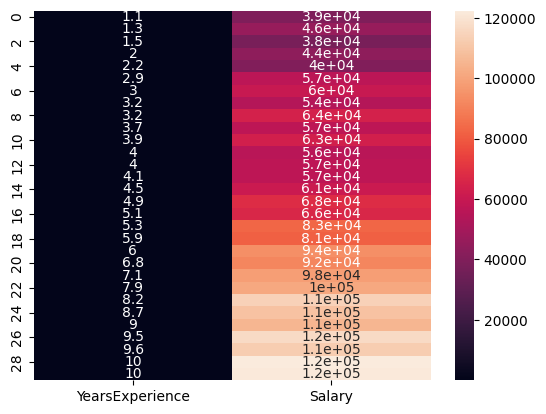

In [29]:
sns.heatmap(data= df, annot=True)
plt.show()

In [7]:
x = df.iloc[:,0:1]
y = df.iloc[:,1:]

Visualization of Correlation beteen x and y

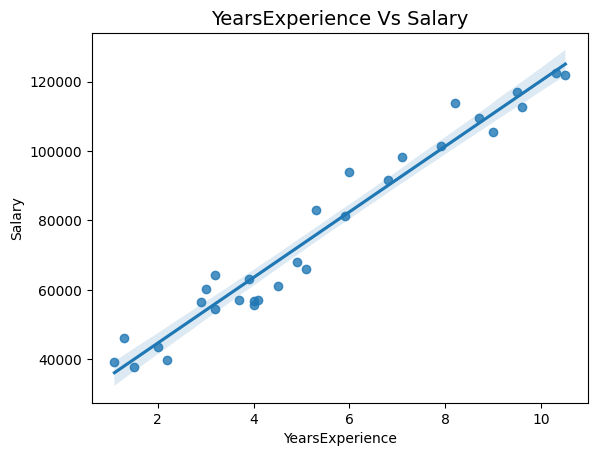

In [31]:
sns.regplot(x='YearsExperience', y='Salary', data= df)
plt.title('YearsExperience Vs Salary', fontsize = 14)
plt.show()

As we can see above
* There is good correlation between the two variable.


Checking for Homoscedasticity or Hetroscedasticity

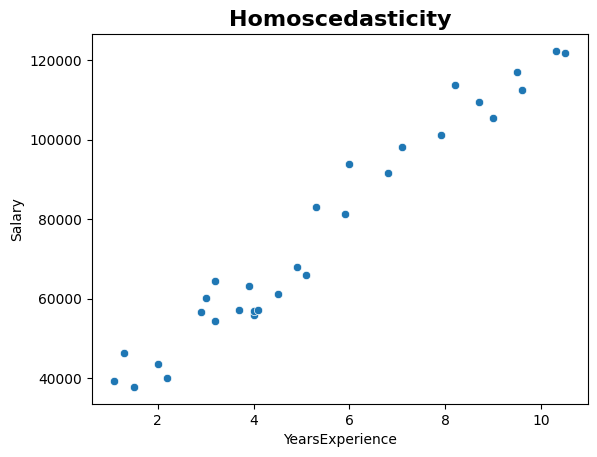

In [32]:
sns.scatterplot(x ='YearsExperience', y ='Salary', data= df)
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [33]:
df.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

As we can see in above graph
* It shows as the Salary Increases the Years of Experience increases variation is constant along the way in data
* The data doesn't have any specific pattern in the variation. hence, we can say it's Homoscedasticity

Trying different transformation of data to estimate normal distribution and remove any skewness

/home/its_relative/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/its_relative/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


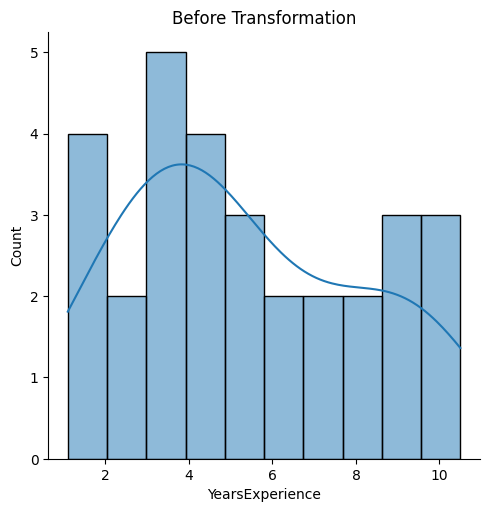

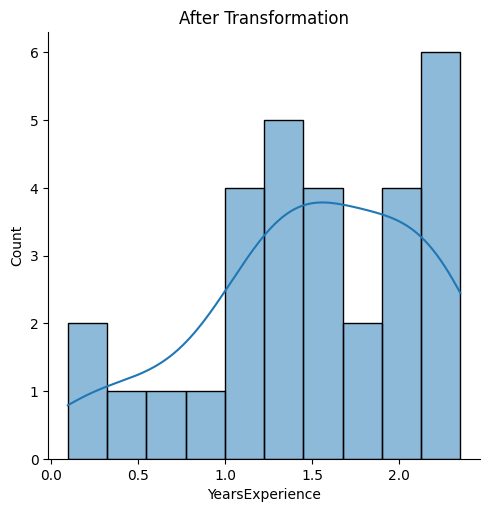

In [34]:
sns.displot(df['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

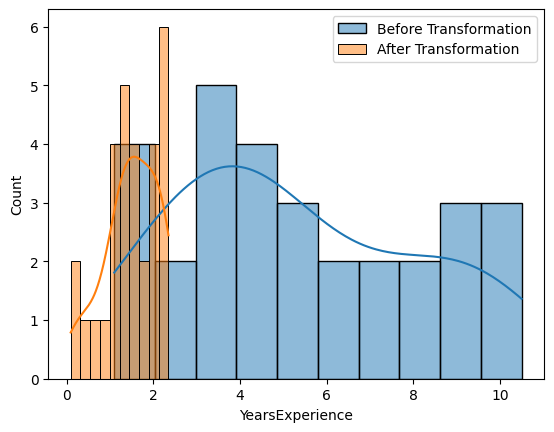

In [36]:
labels = ['Before Transformation','After Transformation']
sns.histplot(df['YearsExperience'], bins=10, kde=True, label=labels[0])
sns.histplot(np.log(df['YearsExperience']), bins=10, kde=True, label=labels[1])
plt.legend()
plt.show()

As we can see
* How log transformation affects the data and it scales the values down.

In [40]:
import statsmodels.api as sm

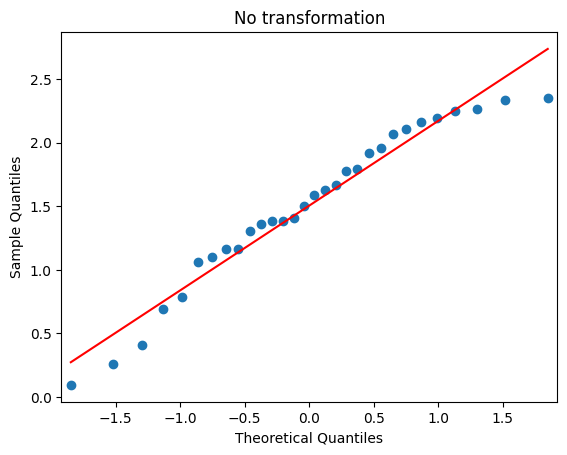

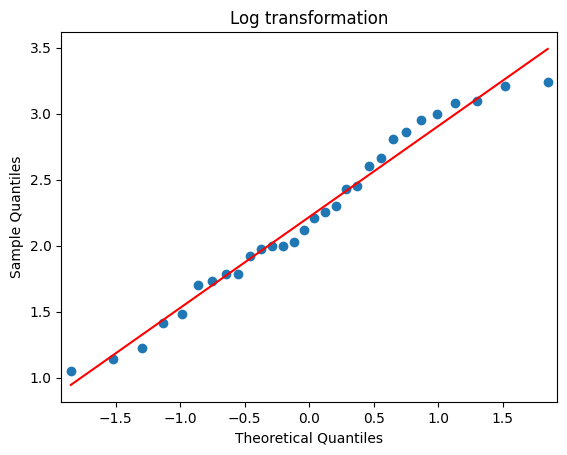

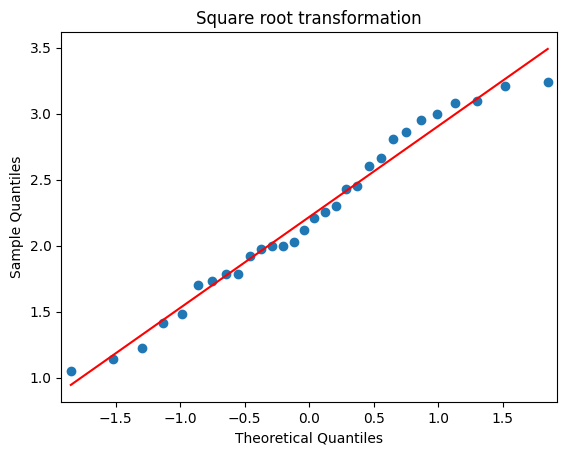

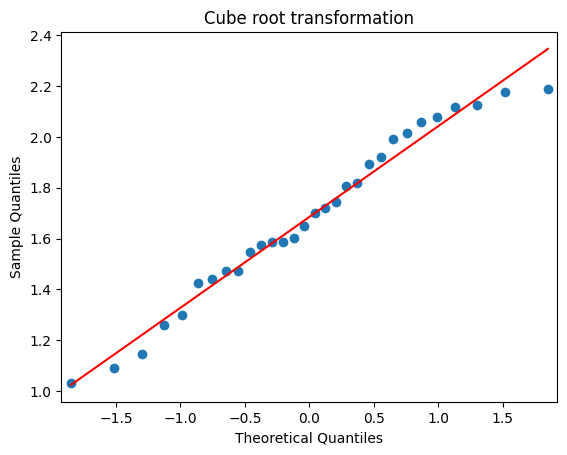

In [41]:
sm.qqplot(np.log(df['YearsExperience']), line = 'r')
plt.title('No transformation')
sm.qqplot(np.sqrt(df['YearsExperience']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(df['YearsExperience']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.cbrt(df['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
plt.show()

/home/its_relative/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/its_relative/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


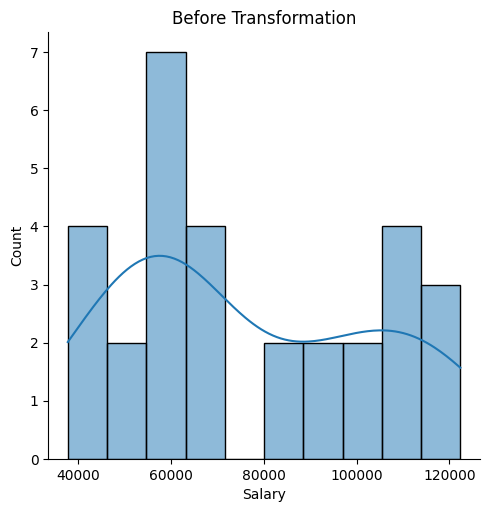

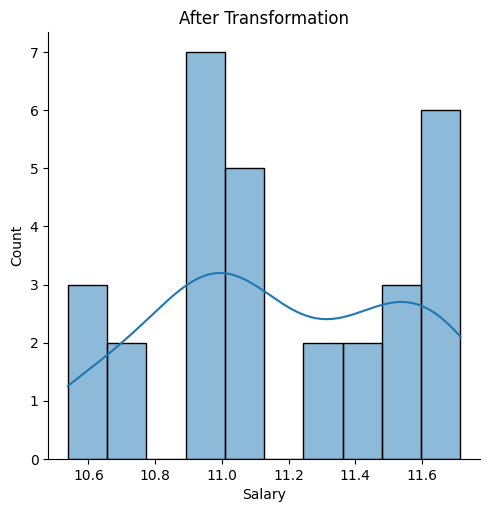

In [42]:
sns.displot(df['Salary'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['Salary']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

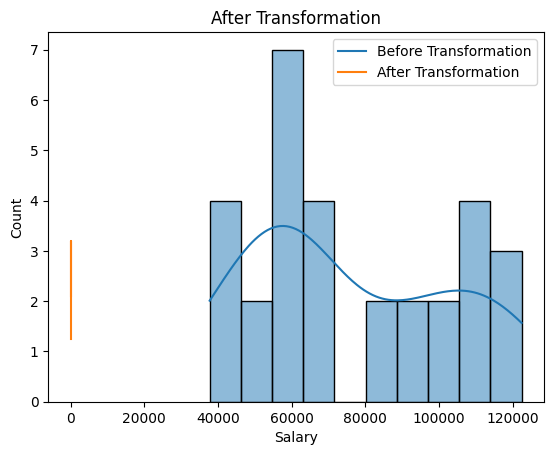

In [45]:
labels = ['Before Transformation','After Transformation']
sns.histplot(df['Salary'], bins = 10, kde = True)
sns.histplot(np.log(df['Salary']), bins = 10, kde = True)
plt.title('After Transformation')
plt.legend(labels)
plt.show()

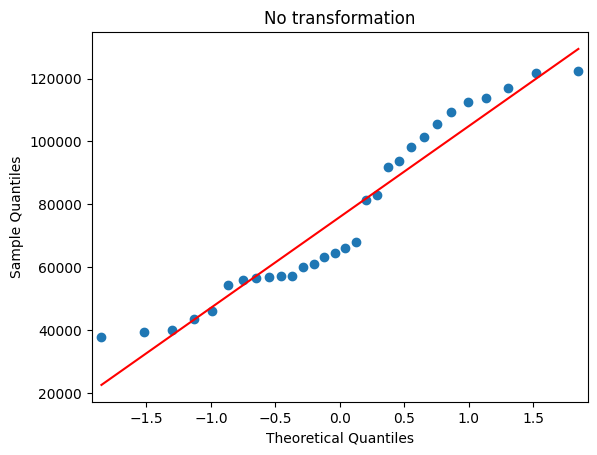

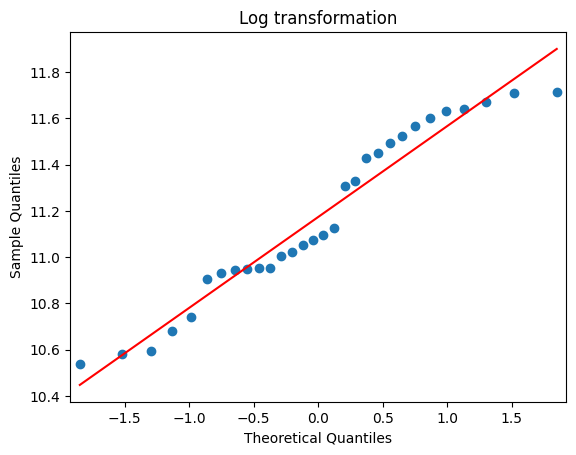

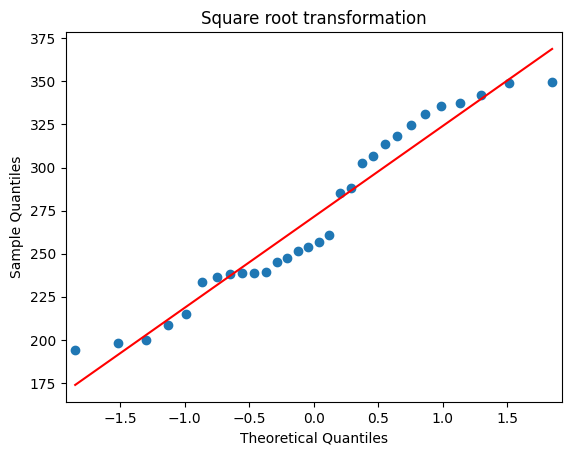

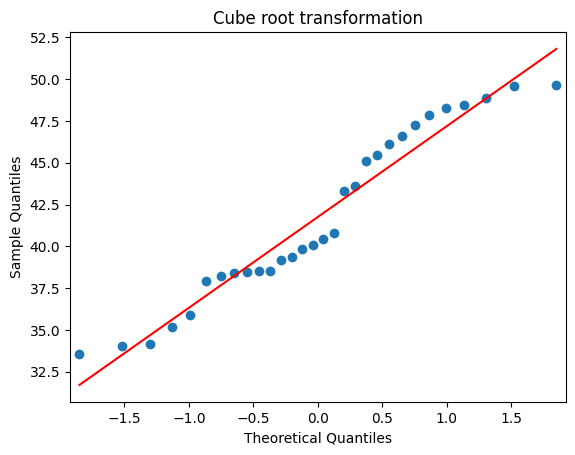

In [46]:
sm.qqplot(df['Salary'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.log(df['Salary']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(df['Salary']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.cbrt(df['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

We only Perform any data transformation when the data is skewed or not normal distribution 

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [11]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [12]:
# x_train
# y_train
# x_test
# y_test

In [13]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [14]:
y_pred = lr.predict(x_test)


In [15]:
comp = pd.DataFrame({"actaul":np.array(y_test).reshape(-1),"pred":np.array(y_pred).reshape(-1)})

In [16]:
from sklearn.metrics import r2_score
r2_score(comp["actaul"],comp["pred"])

0.9541568911215963

In [17]:
comp

,actaul,pred
0,54445.0,56283.046161
1,121872.0,124967.160183
2,61111.0,68514.463726
3,113812.0,103326.959875
4,112635.0,116499.255714
5,101302.0,100504.325052


Square Root transformation on data

In [51]:
import statsmodels.formula.api as smf

In [54]:
linear_model1 = smf.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = df).fit()

In [55]:
print('R-squared     :',linear_model1.rsquared.round(3))
print('Adj.R-squared :',linear_model1.rsquared_adj.round(3))
print('AIC Value     :',linear_model1.aic.round(3))
print('BIC Value     :',linear_model1.bic.round(3))

R-squared     : 0.942
Adj.R-squared : 0.94
AIC Value     : 237.046
BIC Value     : 239.848


As we can notice in the above model
* The R-squared and Adjusted R-squared scores are above 0.85. but its has gotten less than previous model
* AIC and BIC score are now much better for this model
* Lets Try some data transformation to check whether these scores can get any better than this.

Cube Root transformation on data

In [57]:
linear_model2 = smf.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = df).fit()


In [58]:
print('R-squared     :',linear_model2.rsquared.round(3))
print('Adj.R-squared :',linear_model2.rsquared_adj.round(3))
print('AIC Value     :',linear_model2.aic.round(3))
print('BIC Value     :',linear_model2.bic.round(3))

R-squared     : 0.932
Adj.R-squared : 0.93
AIC Value     : 105.179
BIC Value     : 107.981


As we can notice in the above model
* After Cube root transformation on the Data, R-squared and Adjusted R-squared scores have decreased but they are above 0.85.
* Lets Try other data transformation to check whether these scores can get any higher than this.

Log transformation on data

In [60]:
linear_model3 = smf.ols('np.log(Salary)~np.log(YearsExperience)', data = df).fit()


In [61]:
print('R-squared     :',linear_model3.rsquared.round(3))
print('Adj.R-squared :',linear_model3.rsquared_adj.round(3))
print('AIC Value     :',linear_model3.aic.round(3))
print('BIC Value     :',linear_model3.bic.round(3))

R-squared     : 0.905
Adj.R-squared : 0.902
AIC Value     : -42.417
BIC Value     : -39.615


As we can notice in the above model
* After log transformation on the data, This Model scored has not good R-squared and Adjusted R-squared scores than the previous model.

## We can see that the highest r2 score achieved is 0.9541 and that too without any transformation.
 